                      Методы градиентного спуска
Дано:
Целевая функция:        f(x, y) = 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22 
Начальное приближение:  X =  [20, 20]
Точность вычисления:    Eps =  0.01

***********************************************************************************
Методы			     МГС			     МНС
Xmin  		 [-2.23520071 -4.47040087] 	 [-2.23579753 -4.47065764]
f(Xmin)		 -27.999992474633686 			 -27.9999946041604
i			 20 				 18
n			 20 				 494
g			 20 				 18
***********************************************************************************


X = [ 20.000000   20.000000 ] 	f =  2558.656315
X = [ 1.052308   13.507597 ] 	f =  770.196403
X = [ 4.625544   3.079658 ] 	f =  218.309184
X = [ -1.221261   1.076113 ] 	f =  48.006581
X = [ -0.118653   -2.141913 ] 	f =  -4.545700
X = [ -1.922897   -2.760036 ] 	f =  -20.762401
X = [ -1.582673   -3.753059 ] 	f =  -25.766602
X = [ -2.139423   -3.943809 ] 	f =  -27.310812
X = [ -2.034439   -4.250248 ] 	f =  -27.787328
X = [ -2.206

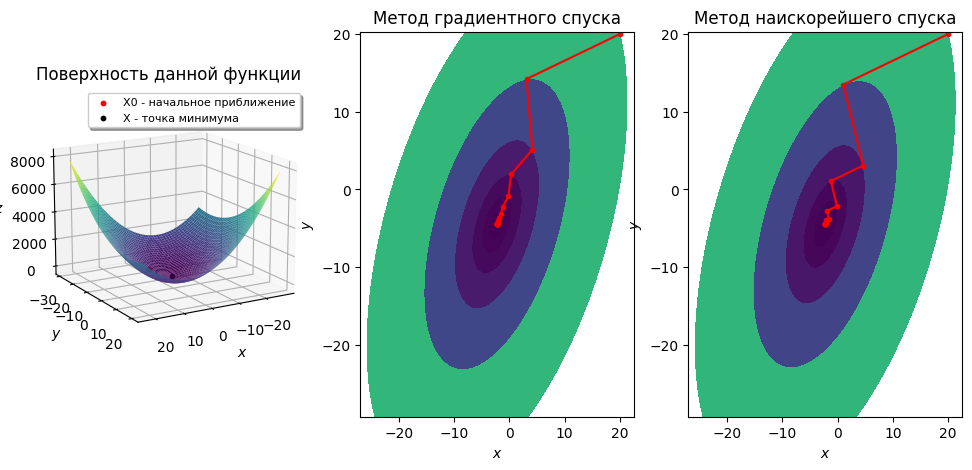

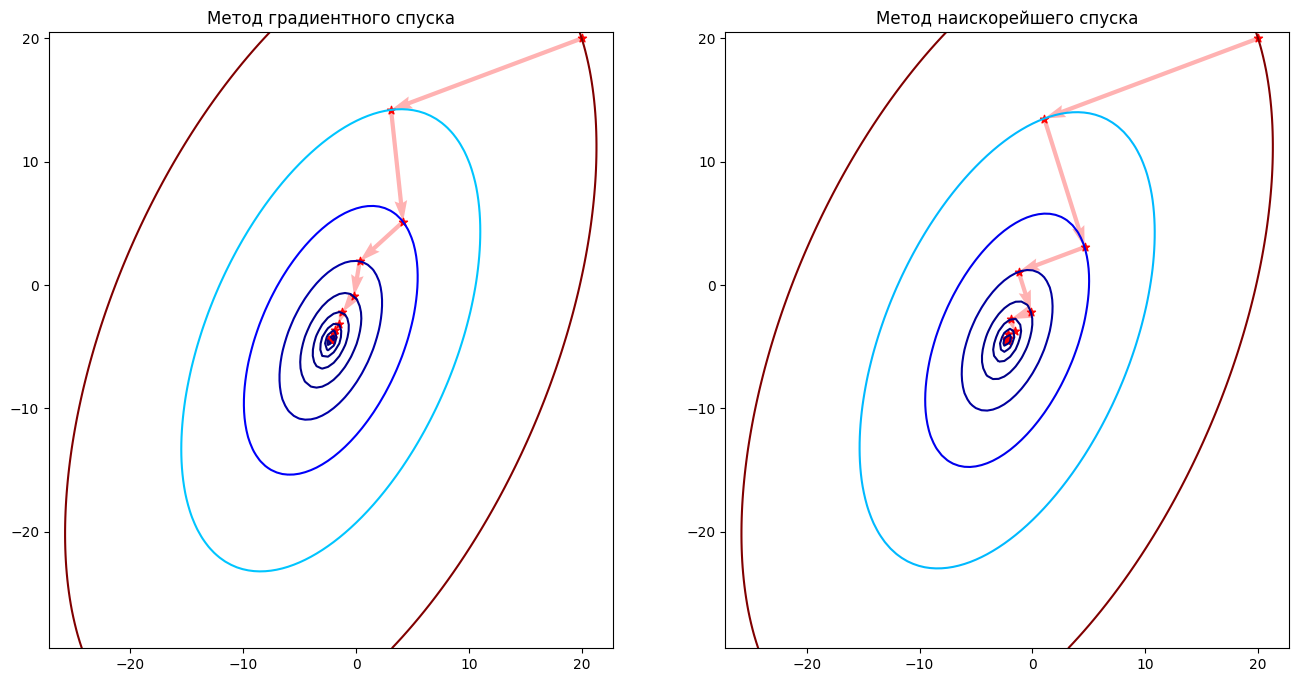

In [101]:
from ast import While
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
kappa0 = 0.1
nu = 0.5
omega = 0.5
alpha_1 = 30
alpha_2 = 133
alpha = alpha_2
eps_1 = 0.01
eps_2 = 0.000001
eps = eps_1
X0 = np.array([-2,1])

# функция Розенброка
f1 = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
f2 = lambda x, y: 10*x**2-4*x*y+7*y**2-4*5**(1/2)*(5*x-y)-16
f3 = lambda x, y: 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22 
f = f3

# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')


#Метод золотого сечения
def golden_ratio(phi, n, b = 2.5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод градиентного спуска
def gradient_descent(X0, eps):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    kappa = kappa0
    Wk = w(X)
    f1 = fun(X)
    n = i = g = 1
    X_p, Y_p = np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
   
    while (np.linalg.norm(Wk))>eps:
        Xk = X + kappa * Wk
        f2 = fun(Xk)
        n += 1
        while (f1 - f2) < omega * kappa * (np.linalg.norm(Wk))**2:
            kappa *= nu
            Xk = X + kappa * Wk
            f2 = fun(Xk)
            n += 1
        kappa = kappa0
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        Wk=w(X)
        f1 = f2
        i += 1
        g += 1
    return Xk, X_p, Y_p, i, n, g


# Метод наискорейшего спуска
def steepest_descent(X0, eps):
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    X_p, Y_p = np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    i = 1
    n = g = 0 
    while True:
        f1 = fun(X)
        n += 1
        Wk = w(X)
        g += 1
        if np.linalg.norm(Wk)<eps:
            break
        phi = lambda kappa: fun(X + kappa * Wk)
        kappa, n = golden_ratio(phi, n)
        Xk = X + kappa * Wk
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1
    return Xk, X_p, Y_p, i, n, g
        



#######################################################################################
#Рисовать
#######################################################################################


def DrawSurfContourAndWk(Xmin, X_p, Y_p, k):
    fig = plt.figure(figsize=(14, 5))
    axes1 = fig.add_subplot(1, 2, 1, projection='3d')
    axes2 = fig.add_subplot(1, 2, 2)
  
    if k == 2:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска')
        axes2.set_title('Метод наискорейшего спуска')

    elif k == 1:
        fig.canvas.manager.set_window_title('Метод градиентного спуска с дроблением шага')
        axes2.set_title('Метод градиентного спуска')

    delta = max(abs(Xmin[0] - X0[0]), abs(Xmin[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    Z = f(X, Y)
    axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    axes1.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    axes1.scatter(Xmin[0], Xmin[1], f(Xmin[0], Xmin[1]), s=20, marker='*', c='black', label='X - точка минимума')
    axes1.legend(shadow=True, fontsize=8)
    axes1.view_init(15, 60)
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_zlabel('$z$')
    axes1.set_title('Поверхность данной функции')

    X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X_p, Y_p))
    axes2.plot(X_p, Y_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Линии уровня и\nтраектория поиска точки')

   

#3D и линии уровня двух графиков
def DrawSurfContour(X1, X2, X_p1, Y_p1, X_p2, Y_p2):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()
    axes1 = fig.add_subplot(1, 3, 1, projection='3d')
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы градиентного спуска')
   
    delta = max(abs(X1[0] - X0[0]), abs(X1[1] - X0[1])) + 0.3

    X, Y = np.meshgrid(np.linspace(X1[0] - delta, X1[0] + delta,  50),
    np.linspace(X1[1] - delta, X1[1] + delta, 50))
    Z = f(X, Y)
    axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    axes1.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=10, c='red', label='X0 - начальное приближение')
    axes1.scatter(X1[0], X1[1], f(X1[0], X1[1]), s=10, c='black', label='X - точка минимума')
    axes1.legend(shadow=True, fontsize=8)
    axes1.view_init(15, 60)
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_zlabel('$z$')
    axes1.set_title('Поверхность данной функции')



    X, Y = np.meshgrid(np.linspace(X1[0] - delta, X1[0] + delta, 50),
    np.linspace(X1[1] - delta, X1[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X_p1, Y_p1))
    axes2.plot(X_p1, Y_p1, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Метод градиентного спуска')

    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3

    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X_p2, Y_p2))
    axes3.plot(X_p2, Y_p2, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод наискорейшего спуска')


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p),color = 'r', marker = '*', alpha = .4)

    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, levels = Val(X_p, Y_p), cmap = 'jet')
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    # ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))




def DrawDraw(X1, X2, X_p1, Y_p1, X_p2, Y_p2):

    delta = max(abs(X1[0] - X0[0]), abs(X1[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(X1[0] - delta, X1[0] + delta,  100),
    np.linspace(X1[1] - delta, X1[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx1 = X_p1[1:] - X_p1[:-1]
    anglesy1 = Y_p1[1:] - Y_p1[:-1]

    fig = plt.figure(figsize = (16,8))



    
    #Contour plot
    ax = fig.add_subplot(1, 2, 1)
    ax.contour(X,Y,Z, levels = Val(X_p1, Y_p1), cmap = 'jet')
    # Plotting the iterations and intermediate values
    ax.scatter(X_p1, Y_p1, color = 'r', marker = '*')
    ax.quiver(X_p1[:-1], Y_p1[:-1], anglesx1, anglesy1, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    # ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))
    ax.set_title('Метод градиентного спуска')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta,  100),
    np.linspace(X2[1] - delta, X2[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx2 = X_p2[1:] - X_p2[:-1]
    anglesy2 = Y_p2[1:] - Y_p2[:-1]

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, levels = Val(X_p2, Y_p2), cmap = 'jet')
    # Plotting the iterations and intermediate values
    ax.scatter(X_p2, Y_p2, color = 'r', marker = '*')
    ax.quiver(X_p2[:-1], Y_p2[:-1], anglesx2, anglesy2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    # ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))
    ax.set_title('Метод наискорейшего спуска')


# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [',np.round(X_p[x],6), ' ',np.round(Y_p[x],6),']','\tf = ',np.round(f(X_p[x],Y_p[x]),6))
    
#######################################################################################
#######################################################################################
#######################################################################################



X0 = [20,20]
eps = 0.01
print(" " * 20,' Методы градиентного спуска')
print('Дано:')
print('Целевая функция:        f(x, y) = 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22 ')
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)
X1, X_p1, Y_p1, i1, n1, g1 = gradient_descent(X0, eps)
X2, X_p2, Y_p2, i2, n2, g2 = steepest_descent(X0, eps)
print()
print('***********************************************************************************')
print('Методы\t\t\t', '    МГС\t\t\t', '    МНС')
print('Xmin  \t\t', X1,'\t', X2)
print('f(Xmin)\t\t', f(X1[0], X1[1]),'\t\t\t', f(X2[0], X2[1]))
print('i\t\t\t', i1,'\t\t\t\t',i2)
print('n\t\t\t', n1,'\t\t\t\t',n2)
print('g\t\t\t', g1,'\t\t\t\t', g2)
print('***********************************************************************************')

#DrawPoints(X_p1, Y_p1) # таблица точек и значений 1
print()
print()
DrawPoints(X_p2, Y_p2) # таблица точек и значений 2

DrawSurfContour(X1, X2, X_p1, Y_p1, X_p2, Y_p2)
#Draw(X1, X_p1, Y_p1)
#Draw(X2, X_p2, Y_p2)
#DrawSurfContourAndWk(X1, X_p1, Y_p1, 1)
#DrawSurfContourAndWk(X2, X_p2, Y_p2,  2)
DrawDraw(X1, X2, X_p1, Y_p1, X_p2, Y_p2)

plt.show()


***************************************Розенброк*****************************************

                      Методы градиентного спуска
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 133*(x**2 - y)**2
Начальное приближение:  X =  [2 3]
Точность вычисления:    Eps =  1e-06

***********************************************************************************
Методы			     МГС			     МНС
Xmin  		 [1.000001 1.000002] 	 [0.999999 0.999998]
f(Xmin)		 0.0 			 0.0
i			 7315 				 748
n			 52085 				 32868
g			 7315 				 748
***********************************************************************************




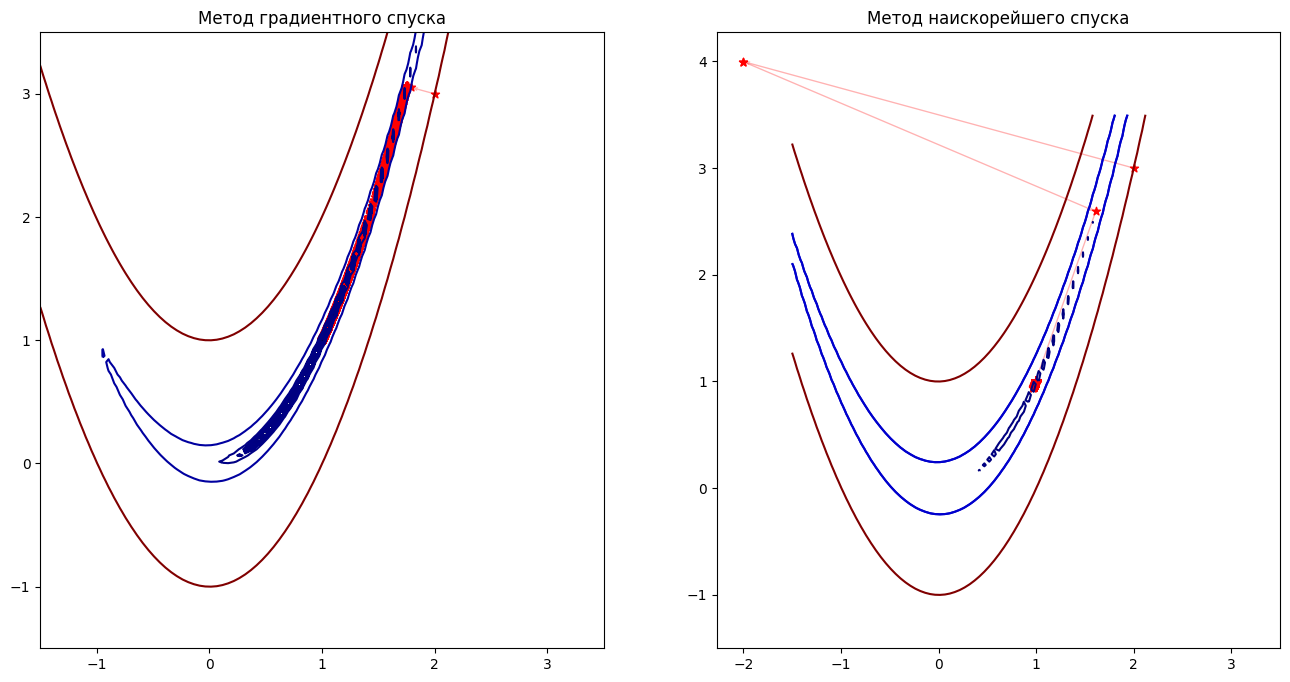

In [109]:
from ast import While
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt



# Параметры методов:
kappa0 = 0.1
nu = 0.5
omega = 0.5
alpha_1 = 50
alpha_2 = 133
alpha = alpha_2
eps_1 = 0.01
eps_2 = 0.000001
eps = eps_2
X0 = np.array([2,3])

# функция Розенброка
f = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
Grad_f = lambda x, y: [alpha*2*(x**2 - y)*2*x + 2*(x - 1), alpha*2*(x**2 - y)*(-1)]

# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
# Grad_f = sp.tensor.array.derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
# Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')
# Grad_f = lambda x, y: alpha * 2 *(x**2 - y) * (2 * x - 1) + 2 * (x - 1)

#Метод золотого сечения
def golden_ratio(phi, n, b = 5, a = 0, e = eps):
    tau = (math.sqrt(5) + 1) / 2
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Ak + ((Bk - Ak) - (Bk - Ak) / tau)
    Xk2 = Ak + (Bk - Ak) / tau
    y1, y2 = phi(Xk1), phi(Xk2)
    n += 2
    while lk >= e/1000:
        if y1 >= y2:
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = phi(Xk2)
            n +=1
        else:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = phi(Xk1)
            n +=1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n


#Метод градиентного спуска
def gradient_descent():
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    kappa = kappa0
    Wk = w(X)
    f1 = fun(X)
    n = i = g = 1
    X_p, Y_p = np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
   
    while (np.linalg.norm(Wk))>eps:
        Xk = X + kappa * Wk
        f2 = fun(Xk)
        n += 1
        while (f1 - f2) < omega * kappa * (np.linalg.norm(Wk))**2:
            kappa *= nu
            Xk = X + kappa * Wk
            f2 = fun(Xk)
            n += 1
        kappa = kappa0
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        Wk=w(X)
        f1 = f2
        i += 1
        g += 1
    return Xk, X_p, Y_p, i, n, g


# Метод наискорейшего спуска
def steepest_descent():
    w = lambda X: -np.array(Grad_f(X[0], X[1]))
    fun = lambda X: f(X[0], X[1])
    X = X0
    X_p, Y_p = np.empty(0), np.empty(0)
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    i = 1
    n = g = 0 
    while True:
        f1 = fun(X)
        n += 1
        Wk = w(X)
        g += 1
        if np.linalg.norm(Wk)<eps:
            break
        phi = lambda kappa: fun(X + kappa * Wk)
        kappa, n = golden_ratio(phi, n)
        Xk = X + kappa * Wk
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        i += 1
    return Xk, X_p, Y_p, i, n, g
        



#######################################################################################
#Рисовать
#######################################################################################


def DrawSurfContourAndWk(Xmin, X_p, Y_p, k):
    fig = plt.figure(figsize=(14, 5))
    axes1 = fig.add_subplot(1, 2, 1, projection='3d')
    axes2 = fig.add_subplot(1, 2, 2)
  
    if k == 2:
        fig.canvas.manager.set_window_title('Метод наискорейщего спуска')
        axes2.set_title('Метод наискорейшего спуска')

    elif k == 1:
        fig.canvas.manager.set_window_title('Метод градиентного спуска с дроблением шага')
        axes2.set_title('Метод градиентного спуска')


    delta = max(abs(Xmin[0] - X0[0]), abs(Xmin[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    Z = f(X, Y)
    axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    axes1.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*', c='red', label='X0 - начальное приближение')
    axes1.scatter(Xmin[0], Xmin[1], f(Xmin[0], Xmin[1]), s=20, marker='*', c='black', label='X - точка минимума')
    axes1.legend(shadow=True, fontsize=8)
    axes1.view_init(15, 60)
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_zlabel('$z$')
    axes1.set_title('Поверхность данной функции')

    X, Y = np.meshgrid(np.linspace(Xmin[0] - delta, Xmin[0] + delta, 50), np.linspace(Xmin[1] - delta, Xmin[1] + delta, 50))
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X_p, Y_p))
    axes2.plot(X_p, Y_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')

   

#3D и линии уровня двух графиков
def DrawSurfContour(X1, X2, X_p1, Y_p1, X_p2, Y_p2):
    fig = plt.figure(figsize =(12,5))
    # fig.canvas.manager.full_screen_toggle()
    axes1 = fig.add_subplot(1, 3, 1, projection='3d')
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    fig.canvas.manager.set_window_title('Методы градиентного спуска')
   
    delta = max(abs(X1[0] - X0[0]), abs(X1[1] - X0[1])) + 0.3

    X, Y = np.meshgrid(np.linspace(X1[0] - delta, X1[0] + delta,  50),
    np.linspace(X1[1] - delta, X1[1] + delta, 50))
    Z = f(X, Y)
    axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
    axes1.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=10, c='red', label='X0 - начальное приближение')
    axes1.scatter(X1[0], X1[1], f(X1[0], X1[1]), s=10, c='black', label='X - точка минимума')
    axes1.legend(shadow=True, fontsize=8)
    axes1.view_init(15, 60)
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_zlabel('$z$')
    axes1.set_title('Поверхность данной функции')



    X, Y = np.meshgrid(np.linspace(X1[0] - delta, X1[0] + delta, 50),
    np.linspace(X1[1] - delta, X1[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contourf(X, Y, Z, levels = Val(X_p1, Y_p1))
    axes2.plot(X_p1, Y_p1, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('Линии уровня и\nтраектория поиска точки')

    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.3

    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
    np.linspace(X2[1] - delta, X2[1] + delta, 50))
    #X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contourf(X, Y, Z, levels = Val(X_p2, Y_p2))
    axes3.plot(X_p2, Y_p2, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Линии уровня и\nтраектория поиска точки')


#3D и линии уровня одного графика
def Draw(X_, X_p, Y_p):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(X_[0] - delta, X_[0] + delta,  100),
    np.linspace(X_[1] - delta, X_[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(X_p, Y_p, f(X_p,Y_p),color = 'r', marker = '*', alpha = .4)

    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, levels = Val(X_p, Y_p), cmap = 'jet')
    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color = 'r', marker = '*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    # ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))




def DrawDraw(X1, X2, X_p1, Y_p1, X_p2, Y_p2):

    delta = max(abs(X1[0] - X0[0]), abs(X1[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(X1[0] - delta, X1[0] + delta,  100),
    np.linspace(X1[1] - delta, X1[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx1 = X_p1[1:] - X_p1[:-1]
    anglesy1 = Y_p1[1:] - Y_p1[:-1]

    fig = plt.figure(figsize = (16,8))



    
    #Contour plot
    ax = fig.add_subplot(1, 2, 1)
    ax.contour(X,Y,Z, levels = Val(X_p1, Y_p1), cmap = 'jet')
    # Plotting the iterations and intermediate values
    ax.scatter(X_p1, Y_p1, color = 'r', marker = '*')
    ax.quiver(X_p1[:-1], Y_p1[:-1], anglesx1, anglesy1, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Метод градиентного спуска')


    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 0.5
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta,  100),
    np.linspace(X2[1] - delta, X2[1] + delta, 100))
    Z = f(X, Y)


    #Angles needed for quiver plot
    anglesx2 = X_p2[1:] - X_p2[:-1]
    anglesy2 = Y_p2[1:] - Y_p2[:-1]

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, levels = Val(X_p2, Y_p2), cmap = 'jet')
    # Plotting the iterations and intermediate values
    ax.scatter(X_p2, Y_p2, color = 'r', marker = '*')
    ax.quiver(X_p2[:-1], Y_p2[:-1], anglesx2, anglesy2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Метод наискорейшего спуска')




# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i],Y_p[i]))
    return Value


# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [','%.6f' % X_p[x], ' ','%.6f' % Y_p[x],']','\tf = ','%.6f' % f(X_p[x],Y_p[x]))
    
#######################################################################################
#######################################################################################
#######################################################################################



print(" " * 20,' Методы градиентного спуска')
print('Дано:')
print('Целевая функция:        f(x, y) = ',f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)
X1, X_p1, Y_p1, i1, n1, g1 = gradient_descent()
X2, X_p2, Y_p2, i2, n2, g2 = steepest_descent()
print()
print('***********************************************************************************')
print('Методы\t\t\t', '    МГС\t\t\t', '    МНС')
print('Xmin  \t\t', np.round(X1, 6),'\t', np.round(X2, 6))
print('f(Xmin)\t\t', np.round(f(X1[0], X1[1]), 6),'\t\t\t', np.round(f(X2[0], X2[1]), 6))
print('i\t\t\t', i1,'\t\t\t\t',i2)
print('n\t\t\t', n1,'\t\t\t\t',n2)
print('g\t\t\t', g1,'\t\t\t\t', g2)
print('***********************************************************************************')
#DrawPoints(X_p1, Y_p1) # таблица точек и значений 1
print()
print()
#DrawPoints(X_p2, Y_p2) # таблица точек и значений 2

# DrawSurfContour(X1, X2, X_p1, Y_p1, X_p2, Y_p2)
#Draw(X1, X_p1, Y_p1)
#Draw(X2, X_p2, Y_p2)
# DrawSurfContourAndWk(X1, X_p1, Y_p1, 1)
# DrawSurfContourAndWk(X2, X_p2, Y_p2,  2)
DrawDraw(X1, X2, X_p1, Y_p1, X_p2, Y_p2)

plt.show()

# Тесты 
# alpha = 5
# eps = 0.01
# X0 = [3,2]

# alpha = 50
# eps = 0.01
# X0 = [3,2]

# alpha = 50
# eps = 0.01
# X0 = [3,2]

# alpha = 30
# eps = 0.01
# X0 = [0,0]

# alpha = 133
# eps = 0.000001
# X0 = [2,3]
